## Final Project Submission

Please fill out:
* Student name: Kandie Phelma 
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# PROJECT:  [House_Prediction_Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data Understanding">Data Understanding</a></li>
<li><a href="#Data Preparation/cleaning">Data Preparation/cleaning</a></li>
<li><a href="#mod">Modelling</a></li>
<li><a href="#mod">Linear regression results</a></li>   
<li><a href="#conclusions">Conclusions</a></li>


# <a id='intro'></a>
# BUSINESS UNDERSTANDING:

## Understanding the problem
<p>Selling a home can be a hectic and tiring process. Homeowners rely on real estate agent's opinions and experience to guide them to the right decisions.
   

My project aims to predict the sale price of houses using the King County housing dataset. The training dataset was provided by Flatiron learning management for our study. 
.</p>




## Problem statement
<p><p> The King County House Dataset contains a wealth of information about the price, size, location, condition and various other features of houses in Washington’s King County. In this article, I’ll present how I built a multiple linear regression model in Python to predict house prices.</p></p>

 <b>Objectives</b>
<ul>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ul>
<p><b>Technical tools:</b>
    Matplotlib to visualize correlations and regression model, Heatmap,Tableau to visualize relationship between price and independent variables, Statsmodels and Scikit_Learn to run multiple linear regression model</p>



<a id='wrangling'></a>
# DATA UNDERSTANDING:
Here will check our variables and try as much as possible to understand it and how it will relate to our questions

In [132]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [133]:
#loading our movie info tsv file
house=pd.read_csv("kc_house_data.csv")
house.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


<ul>
<li>id - Unique ID for each home sold</li>
<li>date - Date of the home sale</li>
<li>price - Price of each home sold</li>
<li>bedrooms - Number of bedrooms</li>
<li>bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower</li>
<li>sqft_living - Square footage of the apartments interior living space</li>
<li>sqft_lot - Square footage of the land space</li>
<li>floors - Number of floors</li>
<li>waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not</li>
<li>iew - An index from 0 to 4 of how good the view of the property was</li>
<li>condition - An index from 1 to 5 on the condition of the apartment,</li>
<li>grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.</li>
<li>qft_above - The square footage of the interior housing space that is above ground level</li>
    <li>sqft_basement - The square footage of the interior housing space that is below ground level</li>
    <li>yr_built - The year the house was initially built</li>
    <li>yr_renovated - The year of the house’s last renovation</li>
    <li>zipcode - What zipcode area the house is in</li>
    <li>lat - Lattitude</li>
    <li>long - Longitude</li>
    <li>sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors</li>
    <li>qft_lot15 - The square footage of the land lots of the nearest 15 neighbors</li>
   
</ul>

In [134]:
#Lets get the number of rows and columns
house.shape

(21597, 21)

In [135]:
# let's obtain a statistical summary of the dataframe

house.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21597.0,NaN,NaN,NaN,4580474287.770987,2876735715.74778,1000102.0,2123049175.0,3904930410.0,7308900490.0,9900000190.0
date,21597,372,6/23/2014,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21597.0,NaN,NaN,NaN,540296.573506,367368.140101,78000.0,322000.0,450000.0,645000.0,7700000.0
bedrooms,21597.0,NaN,NaN,NaN,3.3732,0.926299,1.0,3.0,3.0,4.0,33.0
bathrooms,21597.0,NaN,NaN,NaN,2.115826,0.768984,0.5,1.75,2.25,2.5,8.0
sqft_living,21597.0,NaN,NaN,NaN,2080.32185,918.106125,370.0,1430.0,1910.0,2550.0,13540.0
sqft_lot,21597.0,NaN,NaN,NaN,15099.40876,41412.636876,520.0,5040.0,7618.0,10685.0,1651359.0
floors,21597.0,NaN,NaN,NaN,1.494096,0.539683,1.0,1.0,1.5,2.0,3.5
waterfront,19221,2,NO,19075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,21534,5,NONE,19422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#retriving information
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Date, sqft basement has misplaced datatypes,

In [137]:
#check if there is any duplicate data
house.duplicated().sum()

0

In [138]:
#checking sum of null values
house.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that watefront and the year of renovation has a lot of null values , wel have to clean that, view has lesser missig values

In [139]:
base_10 = house["sqft_basement"].value_counts()
base_10 = base_10.head(10) 
base_10

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
Name: sqft_basement, dtype: int64

### data understanding  summary:
<ul>
    <li>we checked for duplicates, missing data and the data types</li>
    <li>the sqft_basement also has values that are 0.0 which is equal to no, null,              It also has 454 ? values we are unsure of what it is,</li>
    <li>We can see that watefront and the year of renovation has a lot of null values , wel have to clean that, view has lesser missig values
    
</li>
     <li>Date, sqft basement has misplaced datatypes</li>
    <li>The data was also found to be consistent there being no duplicated data.
        
</li>

# DATA PREPARATION

## DATA CLEANING:
Checking for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.

In [140]:
house.yr_renovated.value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [141]:
#replacing view with mode
house['view'] = house['view'].fillna(house['view'].mode()[0])
house.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [142]:
house.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [143]:
#replacing waterfront with mode
house['waterfront'] = house['waterfront'].fillna(house['waterfront'].mode()[0])
house.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [144]:
house.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [145]:
#Drop some of the columns in the dataframe
house.drop(["id","date","sqft_basement"], axis=1, inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   17755 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

### cleaning summary:
* I dropped the Id, date and sqft_ basement column since we wont be using it and has null values


* The watefront column had missing values so we replaced with the mode which was none


* The view column had missing values so we filled with the mode which was No


##  DATA ANALYSIS 

### univariate analysis

In [146]:
house.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639


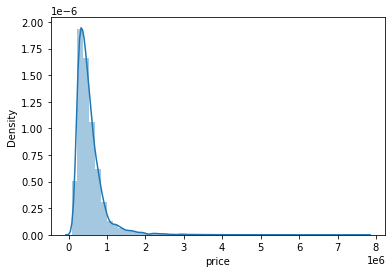

In [147]:
#lets check the distribution of price
sns.distplot(house["price"]);

In [148]:
#skewness and kurtosis
print("Skewness: %f" % house['price'].skew())
print("Kurtosis: %f" % house['price'].kurt())


Skewness: 4.023365
Kurtosis: 34.541359


In [149]:
Q1_price = house['price'].quantile(.25)
Q3_price = house['price'].quantile(.75)
IQR_price = Q3_price - Q1_price
anomalies = house[(house.price < Q1_price - 1.5* IQR_price)  |
                    (house.price > Q3_price + 1.5 * IQR_price) ]
print('Price outliers are: ' + str(anomalies.price.count()))

Price outliers are: 1158


<AxesSubplot:xlabel='price'>

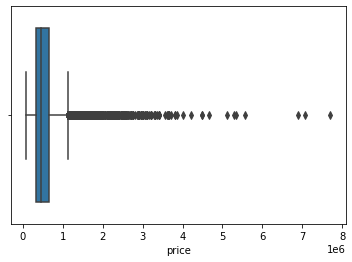

In [150]:
import seaborn as sns
sns.boxplot(x=house['price'])

In [151]:
# I will use the IQR measurement for removing outliers.

Q75 = np.percentile(house['price'],75)
Q25 = np.percentile(house['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

data1 = house[(house['price']<upper)]

4.023364652271239 , 0.7442921856978806


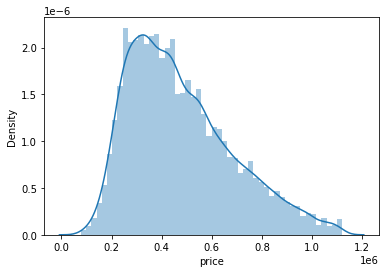

In [152]:
#ploting data withiut outliers
sns.distplot(data1.price) 

print(house['price'].skew(),',', data1['price'].skew())

### univariate analysis summary:
* I checked the price variable, analysed for outliers and then removed the outliers

* I checked for skewenes before and after removing our outliers

* The histogram is not normal; positively skewed graph


### bivariate analysis

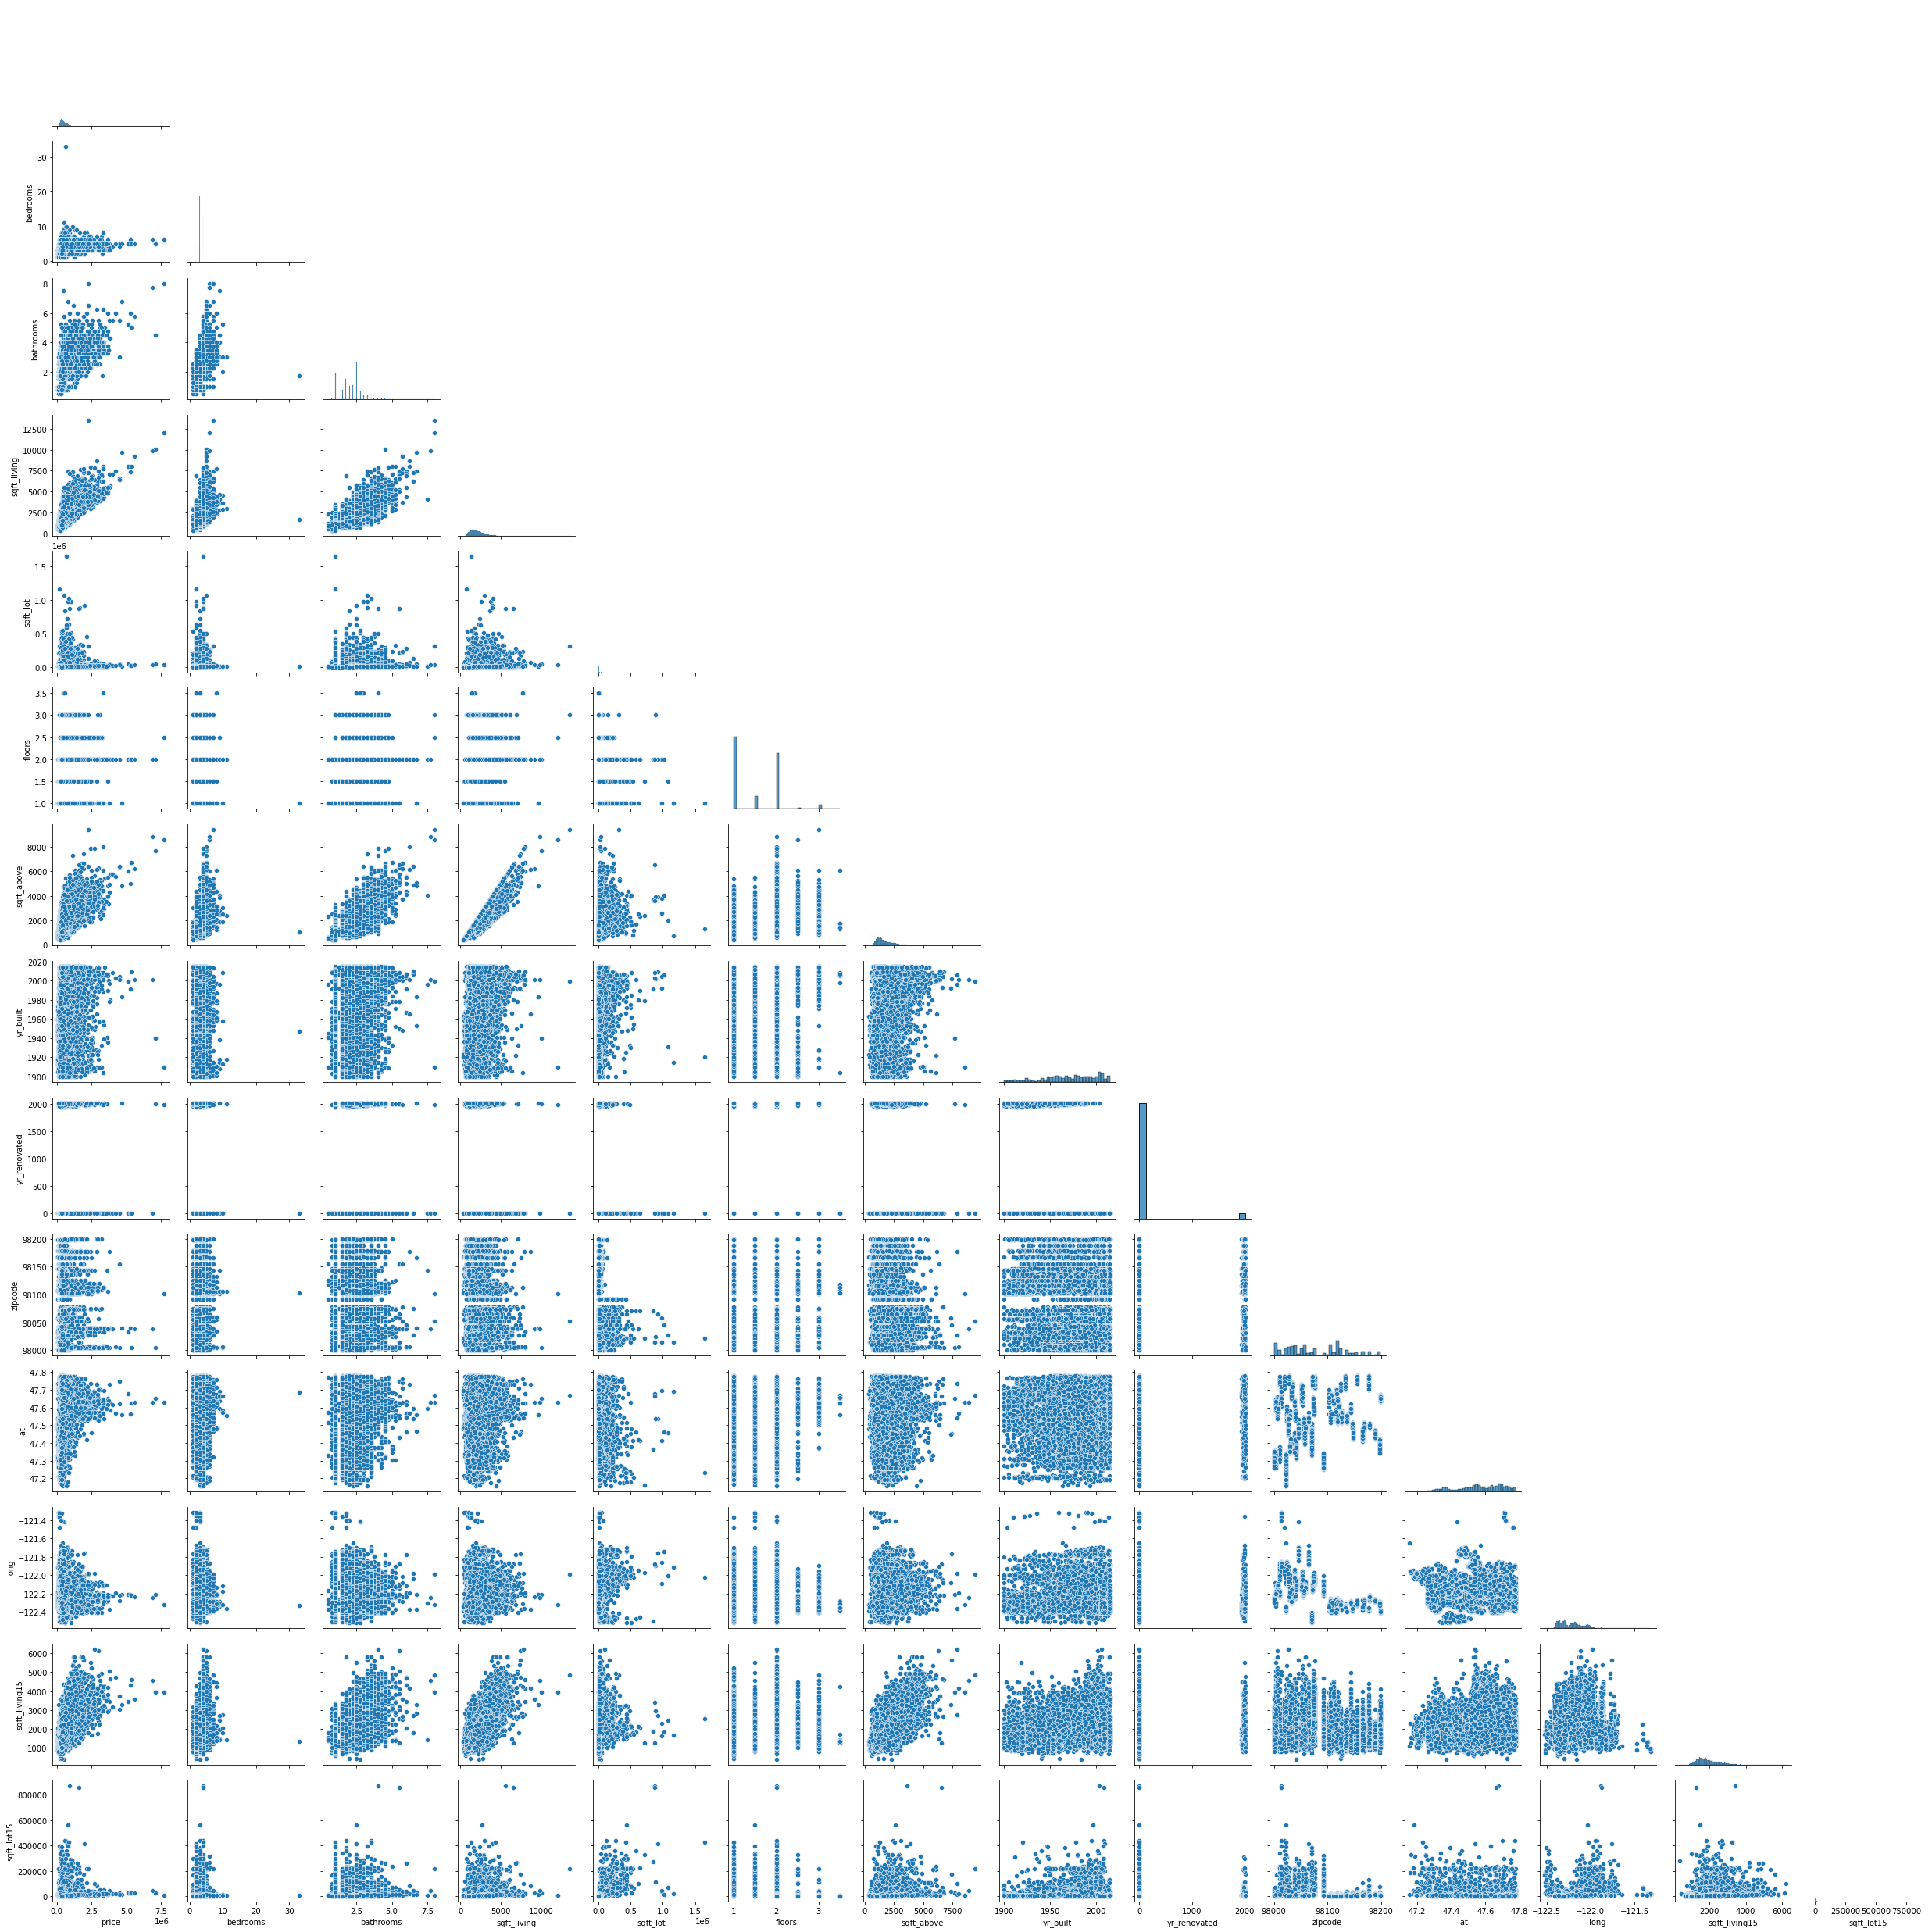

In [153]:
sns.pairplot(house, corner=True);

<AxesSubplot:xlabel='condition', ylabel='grade'>

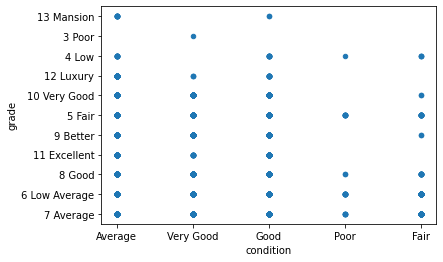

In [154]:
#explore correlation between condition and grade
house.plot.scatter(y="grade",x="condition",)

In [155]:
#lets get contigency table

contigency=pd.crosstab(index=house['condition'], columns=house['grade'])
contigency

grade,10 Very Good,11 Excellent,12 Luxury,13 Mansion,3 Poor,4 Low,5 Fair,6 Low Average,7 Average,8 Good,9 Better
condition,,,,,,,,,,,
Average,921,332,73,11,0,12,100,1035,5229,4266,2041
Fair,2,0,0,0,0,4,15,59,75,13,2
Good,156,56,13,2,0,10,84,685,2831,1394,446
Poor,0,0,0,0,0,1,9,11,6,2,0
Very Good,55,11,3,0,1,0,34,248,833,390,126


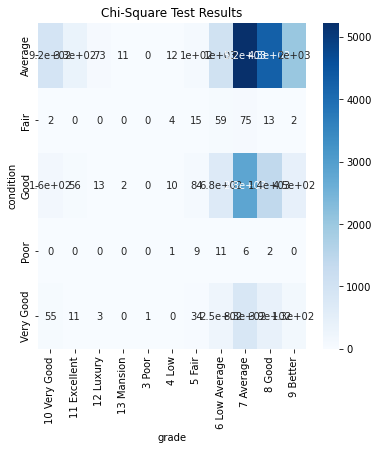

In [156]:
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(contigency, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()

### Correlation between all numeric variables

In [157]:
house.corr()["price"].sort_values()

zipcode         -0.053402
long             0.022036
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
lat              0.306692
bedrooms         0.308787
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

In [158]:
#co-relation matrix
corrM=house.corr()
corrM

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.261570,-0.347210,0.069846,1.000000,0.266742,-0.564259,-0.279299,-0.147294


In [159]:
#drop sqft_living
house.drop(["sqft_living"], axis=1, inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,5650,1.0,NO,NONE,Average,7 Average,1180,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,7242,2.0,NO,NONE,Average,7 Average,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,10000,1.0,NO,NONE,Average,6 Low Average,770,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,5000,1.0,NO,NONE,Very Good,7 Average,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,8080,1.0,NO,NONE,Average,8 Good,1680,1987,0.0,98074,47.6168,-122.045,1800,7503


### bivariate  summary:
<ul>
    <li>we might expect, many of the variables related to the size of homes (e.g. sqft, number of rooms) are highly correlated with each other. Generally, we don’t want to include any two x variables whose correlation exceeds .80 in the same model. We do, however, want to include variables that are correlated with the y variable. Below, I create and display two small data frames that narrow down the correlations we are most interested in.
Sqft_living has high correlation between the independent variables :therefore will drop</li>
    <li>The sqft_living and sqft_living15 have a high coorelation of 0.76</li>
    <li>In the budget dataset we cleaned the $ in the columns, dropped the columns we were not using, changed the object data_types to floats and integers and added another column
</li>
    <li>The data was also found to be consistent there being no duplicated data.
We will be using ratings,genre, director column in the first dataset while in the 2nd one we will use all columns except the release date column
</li>
    <li></li>
</ul>

# MODELLING:


### Lets perfom a simple regression

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

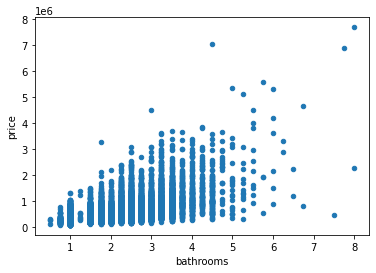

In [160]:
#scatter for price and bathrooms
house.plot.scatter(x="bathrooms",y="price")

In [163]:
count = 0
bath_outliers = []
mean = np.mean(house['bathrooms'])

max_distance = np.std(house['bathrooms']) * 3 

for idx, row in house['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        house.drop(idx, inplace=True)
count

187

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

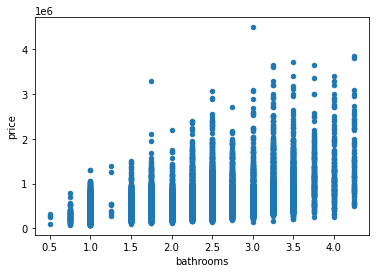

In [104]:
#scatter for price and bathrooms
house.plot.scatter(x="bathrooms",y="price")

In [105]:
x_baseline=house["bathrooms"]
y=house["price"]

In [106]:
import statsmodels.api as sm
#creating the model
model1=sm.OLS(endog=y,exog=sm.add_constant(x_baseline))
results=model1.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     6751.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:44:54   Log-Likelihood:            -2.9956e+05
No. Observations:               21410   AIC:                         5.991e+05
Df Residuals:                   21408   BIC:                         5.991e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.174e+04   6029.377     10.240      0.0

In [108]:
results.params

const         61738.029582
bathrooms    223833.044327
dtype: float64

### model formula
price = 61738.029582 + 223833.044327*bathrooms

### Calculating Mean Absolute Error

In [109]:
MAE=results.resid.abs().sum()/len(y)
MAE

194701.38666187684

### Interpreting MAE
*
*


## Multiple Linear Regression

### First Multiple Regression

In [110]:
print(house.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [116]:
x_second = house[['bedrooms', "bathrooms","sqft_lot","sqft_above","sqft_living15"  ]]
x_second

,bedrooms,bathrooms,sqft_lot,sqft_above,sqft_living15
0,3,1.00,5650,1180,1340
1,3,2.25,7242,2170,1690
2,2,1.00,10000,770,2720
3,4,3.00,5000,1050,1360
4,3,2.00,8080,1680,1800
...,...,...,...,...,...
21592,3,2.50,1131,1530,1530
21593,4,2.50,5813,2310,1830
21594,2,0.75,1350,1020,1020
21595,3,2.50,2388,1600,1410


In [117]:
second_model = sm.OLS(y, sm.add_constant(x_second))
second_results = second_model.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     2973.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:11:53   Log-Likelihood:            -2.9685e+05
No. Observations:               21410   AIC:                         5.937e+05
Df Residuals:                   21404   BIC:                         5.938e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.562e+04   7486.900    -12.772

In [118]:
second_results.params

const           -95621.042452
bedrooms         -8744.828976
bathrooms        67902.648160
sqft_lot            -0.143088
sqft_above         102.492437
sqft_living15      168.891907
dtype: float64

In [119]:
MAE_2=second_results.resid.abs().sum()/len(y)
MAE_2

172552.12780929156

### Second Multiple Linear Regression

#### One_Hot Encoding for Categorical variables

In [121]:
encoded = house[["condition", "grade"]].copy()
encoded.sample(10, random_state=1)

,condition,grade
16458,Average,7 Average
6405,Average,8 Good
9148,Good,8 Good
21561,Average,9 Better
9720,Good,7 Average
12517,Average,6 Low Average
17361,Good,7 Average
4660,Average,7 Average
6430,Average,9 Better
19370,Average,7 Average


In [122]:
pd.get_dummies(house, columns=["condition", "grade"]).head()


,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,5650,1.0,NO,NONE,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,7242,2.0,NO,NONE,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,10000,1.0,NO,NONE,770,1933,NaN,98028,47.7379,-122.233,2720,8062,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,5000,1.0,NO,NONE,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,8080,1.0,NO,NONE,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [123]:
pd.get_dummies(house, columns=["condition", "grade"], drop_first = True).head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,5650,1.0,NO,NONE,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,7242,2.0,NO,NONE,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,10000,1.0,NO,NONE,770,1933,NaN,98028,47.7379,-122.233,2720,8062,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,5000,1.0,NO,NONE,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,8080,1.0,NO,NONE,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [124]:
y = house["price"]
X = house[['bedrooms', "bathrooms","sqft_lot","sqft_above","sqft_living15",'condition', 'grade']]
X

,bedrooms,bathrooms,sqft_lot,sqft_above,sqft_living15,condition,grade
0,3,1.00,5650,1180,1340,Average,7 Average
1,3,2.25,7242,2170,1690,Average,7 Average
2,2,1.00,10000,770,2720,Average,6 Low Average
3,4,3.00,5000,1050,1360,Very Good,7 Average
4,3,2.00,8080,1680,1800,Average,8 Good
...,...,...,...,...,...,...,...
21592,3,2.50,1131,1530,1530,Average,8 Good
21593,4,2.50,5813,2310,1830,Average,8 Good
21594,2,0.75,1350,1020,1020,Average,7 Average
21595,3,2.50,2388,1600,1410,Average,8 Good


In [125]:
X = pd.get_dummies(X, columns=["condition", "grade"], drop_first=True)
X

,bedrooms,bathrooms,sqft_lot,sqft_above,sqft_living15,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,3,1.00,5650,1180,1340,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2.25,7242,2170,1690,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,1.00,10000,770,2720,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,3.00,5000,1050,1360,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,3,2.00,8080,1680,1800,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1131,1530,1530,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21593,4,2.50,5813,2310,1830,0,0,0,0,0,0,0,0,0,0,0,0,1,0
21594,2,0.75,1350,1020,1020,0,0,0,0,0,0,0,0,0,0,0,1,0,0
21595,3,2.50,2388,1600,1410,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [126]:
model_3 = sm.OLS(y, sm.add_constant(X)).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     1335.
Date:                Fri, 30 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:24:29   Log-Likelihood:            -2.9413e+05
No. Observations:               21410   AIC:                         5.883e+05
Df Residuals:                   21390   BIC:                         5.885e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.039e+05   1

In [127]:
model_3.params


const                  6.038704e+05
bedrooms               7.387739e+03
bathrooms              3.924600e+04
sqft_lot              -1.423758e-01
sqft_above             1.356263e+01
sqft_living15          8.245584e+01
condition_Fair         6.641889e+03
condition_Good         6.977823e+04
condition_Poor         4.687968e+04
condition_Very Good    1.656225e+05
grade_11 Excellent     3.209784e+05
grade_12 Luxury        8.100828e+05
grade_13 Mansion       1.408880e+06
grade_3 Poor          -6.600104e+05
grade_4 Low           -5.973038e+05
grade_5 Fair          -5.895699e+05
grade_6 Low Average   -5.418970e+05
grade_7 Average       -4.905017e+05
grade_8 Good          -3.996786e+05
grade_9 Better        -2.313646e+05
dtype: float64

In [128]:
MAE_3=model_3.resid.abs().sum()/len(y)
MAE_3

151334.81882813358

# LINEAR REGRESSION RESULTS:

<ul>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ul>

## Limitations
<ul>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ul>

## Recomendations:

<ul>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ul>